In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mood-art-images-new1/fear art 2.webp
/kaggle/input/mood-art-images-new1/fear art.webp
/kaggle/input/mood-art-images-new1/anxiety art1.webp
/kaggle/input/mood-art-images-new1/anxiety art 2.webp
/kaggle/input/mood-art-images-new1/joy art.webp


# **🧠 Mental Health Journal Assistant**

A generative AI-powered tool that allows users to journal their thoughts, automatically detects the emotion, provides supportive AI responses, generates calming mood-based images, and saves everything as a personal dataset.
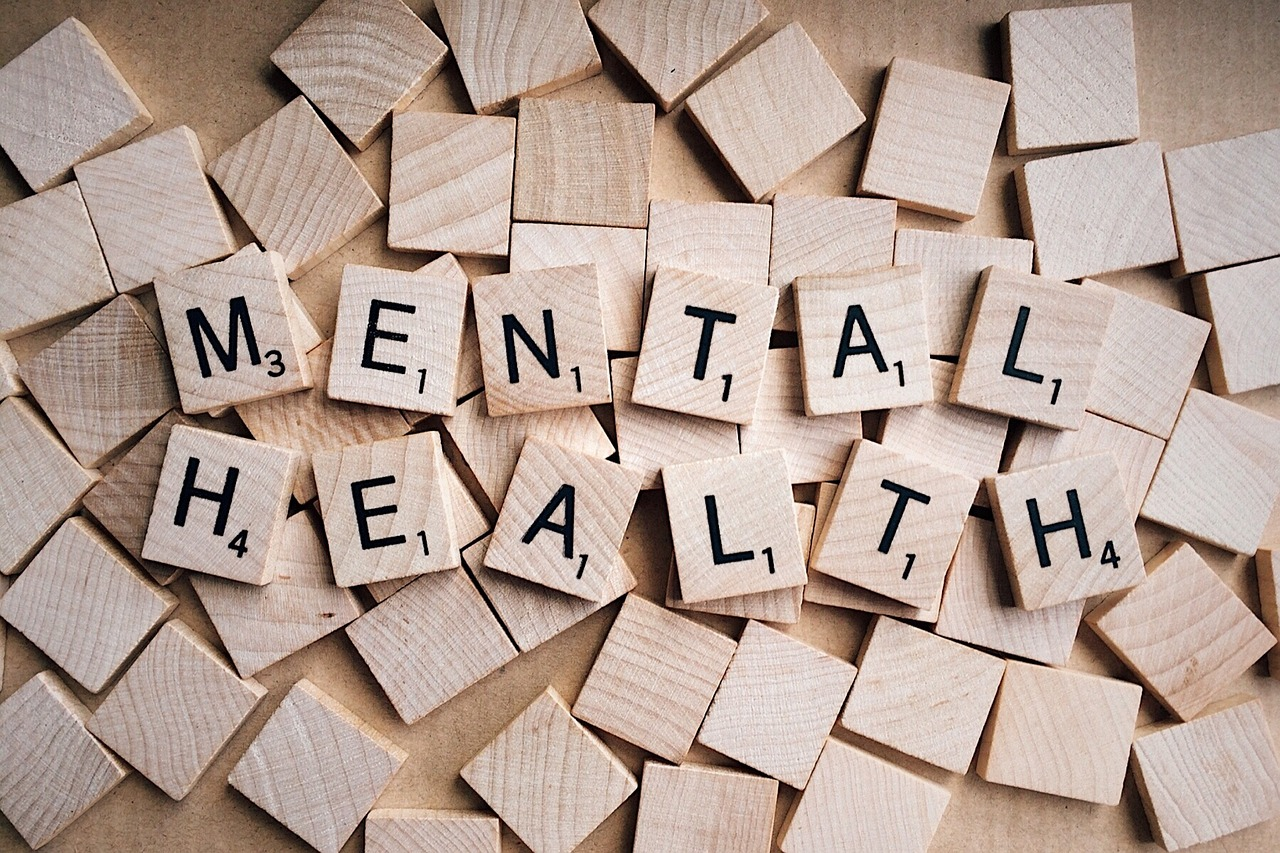


# ⚙️ Setup and Installation
These packages include:

* transformers: for loading pre-trained models like GPT-2 and emotion classifiers.
* datasets: for any dataset handling if needed later.
* diffusers: for generating images using Stable Diffusion.
* sentencepiece: for tokenization support in some models.

# 🧠 Load Dependencies
* PyTorch (torch) for model execution

* HuggingFace pipelines for AI tasks

* datetime to timestamp journal entries

* json for handling structured data (optional) 

In [2]:
!pip install transformers datasets diffusers sentencepiece

import torch
from transformers import pipeline
from datetime import datetime
import json
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow CUDA warnings


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you 

2025-04-19 16:48:26.450494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745081306.687473      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745081306.753357      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 🎨 Load Stable Diffusion for Image Generation 

We use the Stable Diffusion v1.5 model to generate calming or expressive images that reflect the user's emotion.

In [3]:
from diffusers import StableDiffusionPipeline
import torch

# Load image generation pipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# 📝 Journal Entry Input
* This prompts the user to enter their journal thoughts for the day.

In [4]:
# User's journal input
user_entry = "Today, fear crept in like a shadow—silent, but heavy. It wasn’t a loud panic, more like a quiet unease that settled in my chest. I kept second-guessing myself, worried something would go wrong even when there was no sign of it. Fear makes everything feel uncertain, like walking a path with fog all around. I wish I could silence it, even just for a moment."
print("Journal:", user_entry)


Journal: Today, fear crept in like a shadow—silent, but heavy. It wasn’t a loud panic, more like a quiet unease that settled in my chest. I kept second-guessing myself, worried something would go wrong even when there was no sign of it. Fear makes everything feel uncertain, like walking a path with fog all around. I wish I could silence it, even just for a moment.


# 😊 Emotion Detection from Journal Text

We use a fine-tuned DistilRoBERTa model to classify the user's journal entry into emotions like joy, sadness, anger, etc.

In [5]:
from transformers import pipeline

# Load the emotion classification pipeline with score outputs
emotion_analyzer = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base", 
    return_all_scores=True
)

def emotion_classifier(text):
    result = emotion_analyzer(text)
    # Select the emotion with the highest score
    top_emotion = sorted(result[0], key=lambda x: x['score'], reverse=True)[0]
    return top_emotion['label']
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", top_k=None)


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


# 🔍 Test Emotion Classifier
This test checks if the emotion_classifier function correctly identifies the dominant emotion from a sample journal entry.

In [6]:
test_text = "I feel scared and terrified something bad will happen."
print("Detected Emotion:", emotion_classifier(test_text))


Detected Emotion: [[{'label': 'fear', 'score': 0.9978067278862}, {'label': 'surprise', 'score': 0.000820412184111774}, {'label': 'anger', 'score': 0.000596877362113446}, {'label': 'sadness', 'score': 0.0003569539694581181}, {'label': 'joy', 'score': 0.0002620482409838587}, {'label': 'love', 'score': 0.000157036745804362}]]


# 💬 Generate a Supportive AI Response Based on Emotion

This function takes the detected emotion and returns a supportive, empathetic message. It's designed to provide comfort, encouragement, or reflection based on how the user is feeling.

In [7]:
def generate_response(user_entry, emotion):
    responses = {
        "joy": "That's wonderful! Take a moment to savor and celebrate this joy.",
        "sadness": "It's okay to feel sad. Be gentle with yourself and take your time to heal.",
        "anger": "Try to acknowledge the anger without judgment. You're allowed to feel this way.",
        "fear": "You're not alone — it's okay to feel afraid. Try grounding yourself with a calming activity.",
        "disgust": "That must have been uncomfortable. Talking about it is a strong step forward.",
        "surprise": "Unexpected things can be overwhelming or exciting. Either way, it's valid to feel shaken.",
        "neutral": "Thanks for sharing your thoughts. Reflecting like this is very powerful.",
        "love": "That's beautiful. Hold onto that warmth and connection whenever you need it.",
        "anxiety": "Take a deep breath. You are safe right now, and things will become clearer soon."
    }

    return responses.get(emotion.lower(), "Thank you for sharing. Your emotions are valid and important.")


In [8]:
response = generate_response("I feel nervous about my future.", "fear")
print(response)


You're not alone — it's okay to feel afraid. Try grounding yourself with a calming activity.


# 🧠 Generate AI Supportive Response Using FLAN-T5
This function takes the user's journal entry and the detected emotion, then generates a thoughtful and emotion-aware response using a generative transformer model.

In [9]:
from transformers import pipeline

# Load this once at the top
support_bot = pipeline("text2text-generation", model="google/flan-t5-small")

def generate_response(user_entry, emotion):
    prompt = f"Give a comforting response to someone feeling {emotion}: {user_entry}"
    response = support_bot(prompt, max_new_tokens=60)[0]['generated_text']
    return response


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


# 🎨 Display Mood Art Based on Emotion
📌 This step visually reinforces the user's emotion using a themed artwork, making the journaling experience more engaging and expressive.

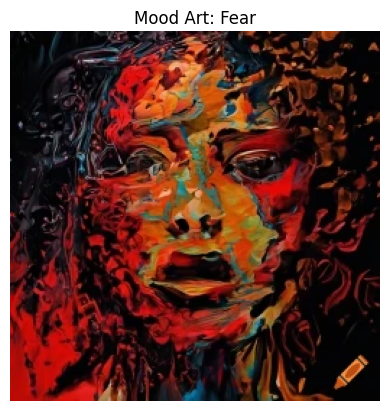

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/input/mood-art-images-new1/fear art 2.webp")
plt.imshow(img)
plt.axis('off')
plt.title("Mood Art: Fear")
plt.show()

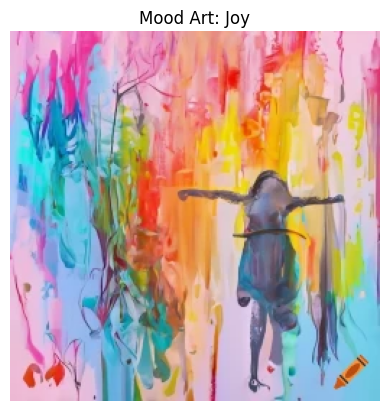

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/input/mood-art-images-new1/joy art.webp")
plt.imshow(img)
plt.axis('off')
plt.title("Mood Art: Joy")
plt.show()

# 🧠 Load Emotion Classifier Pipeline
📌 In this step, we use the Hugging Face pipeline to load a pre-trained model that detects emotions from English text. It returns a list of possible emotions with their confidence scores, enabling accurate emotional analysis of journal entries

In [12]:
from transformers import pipeline

# Load the emotion classifier
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)


Device set to use cpu


In [13]:
result = emotion_classifier(user_entry)


# 📈 Emotion Detection: Get Top Emotion and Confidence Score
Extracts the most likely emotion and its confidence score from model output.

In [14]:
# Get top emotion with highest score
top_emotion = max(result[0], key=lambda x: x['score'])
emotion = top_emotion['label']
score = top_emotion['score']

print("Detected Emotion:", emotion)
print("Confidence Score:", score)


Detected Emotion: fear
Confidence Score: 0.9903918504714966


# 🔍 Inspecting the Emotion Classifier Output
Purpose:

  * This helps verify how the emotion_classifier function formats its output.

  * type(result) should return <class 'list'>, and result should be a list containing dictionaries     of emotions with their scores.

In [15]:
user_entry = "I feel scared and terrified something bad will happen."
result = emotion_classifier(user_entry)
print("Result type:", type(result))
print("Result value:", result)


Result type: <class 'list'>
Result value: [[{'label': 'anger', 'score': 0.0005976393003948033}, {'label': 'disgust', 'score': 0.0004468770930543542}, {'label': 'fear', 'score': 0.9947289824485779}, {'label': 'joy', 'score': 0.0008951518102549016}, {'label': 'neutral', 'score': 0.0011632292298600078}, {'label': 'sadness', 'score': 0.0012016023974865675}, {'label': 'surprise', 'score': 0.0009663993841968477}]]


# 🎨 Generate Image Prompt Based on Detected Emotion


In [16]:

image_prompt = f"A calming image that reflects the emotion {emotion}"

# 🖼️ Generate and Save Mood-Based Image
This block generates an AI image based on the emotion-specific prompt using the Stable Diffusion pipeline. It then saves the generated image locally with a filename based on the current date (e.g., mood_image_2025-04-05.png

In [17]:
image = pipe(image_prompt).images[0]
image_filename = f"mood_image_{datetime.now().date()}.png"
image.save(image_filename)


  0%|          | 0/50 [00:00<?, ?it/s]

# 💾 Saving Journal Entries to a JSON File
This block saves each journal entry (user input, emotion, AI response, and mood image path) into a local journal_data.json file. It checks if the file already exists and loads previous data, then appends the new entry and saves the updated list.

In [18]:
import json
import os
from datetime import datetime

# Load existing journal data (if available)
if os.path.exists("journal_data.json"):
    with open("journal_data.json", "r") as f:
        journal_data = json.load(f)
else:
    journal_data = []

# Create new entry
journal_entry = {
    "date": str(datetime.now().date()),
    "entry": user_entry,
    "emotion": emotion,
    "response": response,  
    "image_prompt": image_prompt,
    "mood_image_path": image_filename
}

# Append and save
journal_data.append(journal_entry)

with open("journal_data.json", "w") as f:
    json.dump(journal_data, f, indent=2)

print("✅ Journal entry added to your mental health log!")



✅ Journal entry added to your mental health log!


# Saving All Journal Entries to a Master File
This code block ensures all past and present entries are saved to a master file (all_journals.json). It's useful if you want to analyze or back up all logs in one place separate from daily saves.

In [19]:
import os

# Load old entries if the file exists
if os.path.exists("all_journals.json"):
    with open("all_journals.json", "r") as f:
        journal_data = json.load(f)
else:
    journal_data = []

# Add new entry
journal_data.append(journal_entry)

# Save back
with open("all_journals.json", "w") as f:
    json.dump(journal_data, f, indent=2)

print("All journal entries saved!")


All journal entries saved!


# 📊 Count Emotions from Journal Entries
This block analyzes all saved journal entries and extracts the detected emotions. It handles both dictionary and string formats, ensuring consistent counting using Python’s Counter class

In [20]:
from collections import Counter

emotion_list = []

for entry in journal_data:
    emotion = entry.get("emotion")

    # If it's a list (e.g. [{"label": "joy"}]), extract the label
    if isinstance(emotion, list):
        if isinstance(emotion[0], dict) and 'label' in emotion[0]:
            emotion_list.append(emotion[0]['label'])
        else:
            emotion_list.append(str(emotion))
    else:
        emotion_list.append(str(emotion))

emotion_counts = Counter(emotion_list)
print(emotion_counts)


Counter({'fear': 1})


# 🚀 Load Journal Data into a DataFrame
This step loads the journal entries into a Pandas DataFrame, which helps in analyzing, cleaning, and visualizing data more efficiently. Each entry contains the text and the corresponding detected emotion with its score.

In [21]:
import pandas as pd
journal_data = [
    {"entry": "I feel anxious about my exams", "emotion": [{"label": "fear", "score": 0.92}]},
    {"entry": "I had a fun day with friends", "emotion": [{"label": "joy", "score": 0.87}]}
]

df = pd.DataFrame(journal_data)


# 😄 Extract Emotion Labels from Data
This helper function cleans and extracts the emotion label from each journal entry. Emotions are often stored as lists of dictionaries, so this step simplifies that structure to make analysis easier.

In [22]:
def extract_emotion_label(emotion):
    if isinstance(emotion, list):
        if len(emotion) > 0 and isinstance(emotion[0], dict):
            return emotion[0].get("label", "unknown")
        else:
            return str(emotion[0]) if emotion else "unknown"
    return str(emotion)



# 📌 Add a Timestamp Column to Journal Data
This line adds a new date column to the DataFrame, assigning the current date (as a timestamp) to each journal entry. This will be helpful for plotting emotions over time or filtering entries by date.

In [23]:
from datetime import datetime
df["date"] = pd.to_datetime(datetime.now().date())


# 📅 Converting Date Column to Datetime Format

This step ensures that the "date" column in the DataFrame (`df`) is converted to a datetime object, enabling time-based operations like sorting and filtering.


In [24]:
df["date"] = pd.to_datetime(df["date"])


# 🧐 Inspecting the First Few Entries of the "emotion" and "date" Columns

This step checks the initial values of the "emotion" and "date" columns in the DataFrame (`df`) to ensure the data has been properly processed and formatted.


In [25]:
print(df["emotion"].head())
print(df["date"].head())


0    [{'label': 'fear', 'score': 0.92}]
1     [{'label': 'joy', 'score': 0.87}]
Name: emotion, dtype: object
0   2025-04-19
1   2025-04-19
Name: date, dtype: datetime64[ns]


# 🔧Fixing the "emotion" Value Format

This function applies a fix to the "emotion" column in the DataFrame by checking if the value is a list. If it's a list, the first item is extracted, otherwise, "unknown" is assigned as the value. This ensures that the "emotion" values are in a consistent format for further analysis.


In [26]:
def fix_emotion_value(val):
    if isinstance(val, list):
        return val[0] if val else "unknown"
    return val

df["emotion"] = df["emotion"].apply(fix_emotion_value)


# 🧠 Extracting Emotion Labels from Nested Structures

This function processes and normalizes the "emotion" values in the DataFrame. If the value is a dictionary, it extracts the 'label' key. If it's a list (possibly containing dictionaries), it retrieves the first element's label. If neither condition is met, it returns the value as a string. The `apply()` function is then used to apply this logic to the "emotion" column in the DataFrame, ensuring consistent labels across the data.


In [27]:
def get_emotion_label(val):
    if isinstance(val, dict):
        return val.get('label', 'unknown')
    elif isinstance(val, list) and len(val) > 0:
        if isinstance(val[0], dict):
            return val[0].get('label', 'unknown')
        return val[0]
    return str(val)

df["emotion"] = df["emotion"].apply(get_emotion_label)


# 📊 Visualizing Emotion Trends Over Time

This code generates a stacked bar chart to display the frequency of different emotions over time. It groups the DataFrame by date and emotion, then uses `unstack()` to pivot the data, filling missing values with 0. The chart provides a clear visual representation of emotional trends, allowing for easy analysis of changes in emotional states across different dates.


<Axes: title={'center': 'Emotion Timeline'}, xlabel='date'>

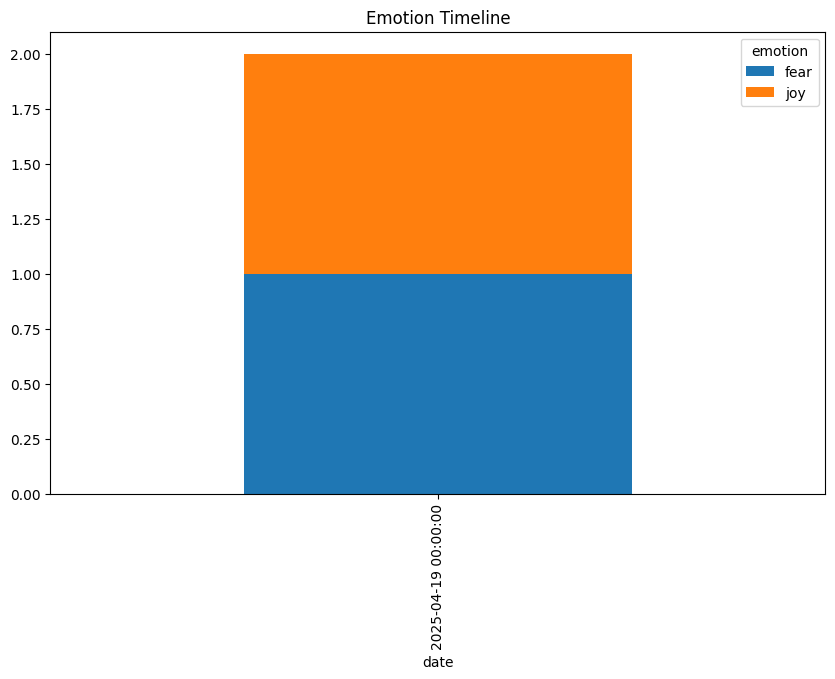

In [28]:
emotion_timeline = df.groupby(["date", "emotion"]).size().unstack(fill_value=0)
emotion_timeline.plot(kind="bar", stacked=True, figsize=(10, 6), title="Emotion Timeline")


# 📅 Displaying Emotion Data by Date

This snippet groups the journal data by both date and emotion, then reshapes it to show emotion counts for each day. Using `display()`, it presents a clean table that helps analyze how emotional states vary across dates.


In [29]:
emotion_timeline = df.groupby(["date", "emotion"]).size().unstack(fill_value=0)
display(emotion_timeline)


emotion,fear,joy
date,,
2025-04-19,1,1


# 🥧 Visualizing Emotion Distribution with a Pie Chart

This code creates a pie chart to show the proportion of each emotion detected in the journal entries. It gives a quick visual summary of how frequently different emotions appear across all entries.


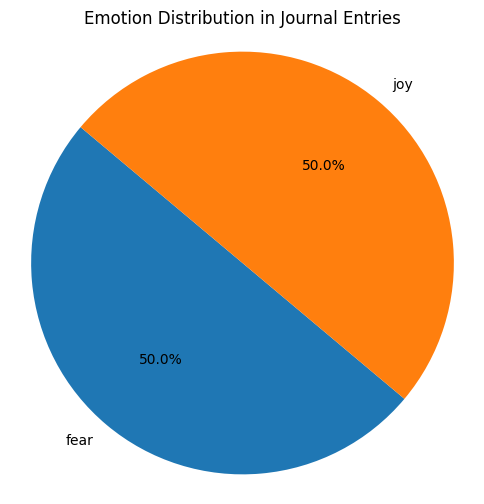

In [30]:
import matplotlib.pyplot as plt

# Count emotion occurrences
emotion_counts = df["emotion"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Emotion Distribution in Journal Entries")
plt.axis('equal')  # Makes it a perfect circle
plt.show()



# 📈 Emotion Trends Over Time

This line chart displays how different emotions have fluctuated over time in your journal entries. Each point shows the number of times a specific emotion appeared on a given date, helping you spot emotional trends or recurring patterns.


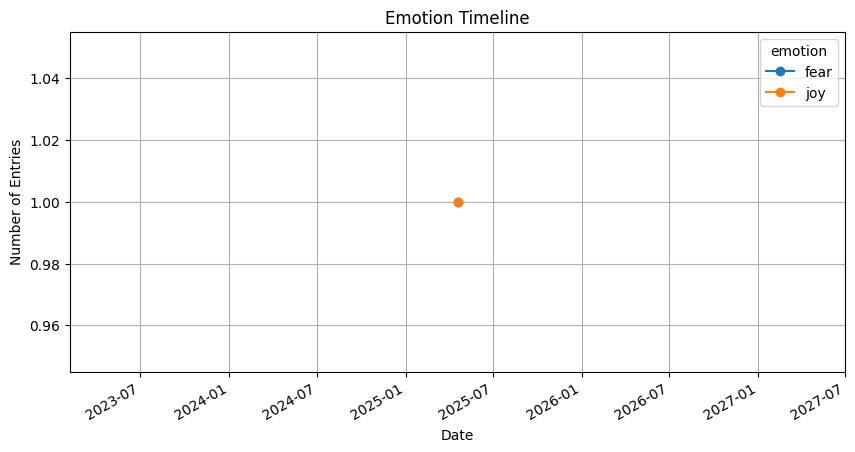

In [31]:
emotion_timeline.plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Emotion Timeline")
plt.xlabel("Date")
plt.ylabel("Number of Entries")
plt.grid(True)
plt.show()


In [32]:
!pip install reportlab


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


# 📄 Generate PDF for Mental Health Journal

This section creates a clean, printable PDF containing all journal entries, detected emotions, AI-generated responses, and a random affirmation. The PDF is styled with headings, wrapped text, and page breaks for readability.
📓 Journal Entries: Each entry includes:

*  📅 Date

* 💭 Detected emotion

*  📝 User's journal text (wrapped neatly)

* 🤖 AI-generated response

In [33]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import random
from datetime import datetime

def generate_pdf_with_all(journal_data, user_name="Anonymous", filename="mental_health_journal.pdf"):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter
    y = height - 50

    # 🪪 Header Info
    c.setFont("Helvetica-Bold", 16)
    c.drawString(50, y, "🧠 Mental Health Journal")
    y -= 30

    c.setFont("Helvetica", 12)
    c.drawString(50, y, f"Prepared for: {user_name}")
    y -= 20
    c.drawString(50, y, f"Generated on: {str(datetime.now().date())}")
    y -= 30

    # 💬 Affirmation
    affirmations = [
        "You are doing your best, and that is enough.",
        "Every emotion you feel is valid.",
        "You are strong, even on hard days.",
        "Healing is not linear, and that’s okay.",
        "You are worthy of love and peace."
    ]
    daily_affirmation = random.choice(affirmations)
    c.setFont("Helvetica-Oblique", 11)
    c.drawString(50, y, f"💬 Affirmation: {daily_affirmation}")
    y -= 40

    # 📓 Journal Entries
    c.setFont("Helvetica", 11)
    for entry in journal_data:
        date = entry.get("date", "Unknown Date")
        emotion = entry.get("emotion", "Unknown")
        user_entry = entry.get("entry", "")
        ai_response = entry.get("response", "")

        if y < 150:
            c.showPage()
            y = height - 50
            c.setFont("Helvetica", 11)

        c.drawString(50, y, f"📅 Date: {date}")
        y -= 20
        c.drawString(50, y, f"💭 Emotion: {emotion}")
        y -= 20
        c.drawString(50, y, "📝 Entry:")
        y -= 15

        # Wrap long text for journal entry
        for line in user_entry.split('\n'):
            lines = [line[i:i+90] for i in range(0, len(line), 90)]
            for wrapped_line in lines:
                c.drawString(60, y, wrapped_line)
                y -= 15

        c.drawString(50, y, "🤖 AI Response:")
        y -= 15

        for line in ai_response.split('\n'):
            lines = [line[i:i+90] for i in range(0, len(line), 90)]
            for wrapped_line in lines:
                c.drawString(60, y, wrapped_line)
                y -= 15

        y -= 30  # Space between entries

    c.save()
    print(f"✅ PDF saved as: {filename}")



In [34]:
generate_pdf_with_all(journal_data, user_name="Your Name")


✅ PDF saved as: mental_health_journal.pdf


# 📄 PDF Creation Setup
🖼 Adding Images to the PDF

This section includes how to set up and add images to the PDF document using the drawImage function from the reportlab library.

In [35]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from PIL import Image
import os

c = canvas.Canvas("mental_health_journal.pdf", pagesize=letter)
width, height = letter
y = height - 50

# Your loop here...
# (Insert your code)

c.save()
print("✅ PDF with images saved!")


✅ PDF with images saved!


In [36]:
!pip install diffusers transformers accelerate torch


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.9.90:
      Successfully uninstalled nvidia-curand-cu12-10.3.9.90
  Attempting

In [37]:
result = emotion_classifier(user_entry)
print(result)


[[{'label': 'anger', 'score': 0.0005976393003948033}, {'label': 'disgust', 'score': 0.0004468770930543542}, {'label': 'fear', 'score': 0.9947289824485779}, {'label': 'joy', 'score': 0.0008951518102549016}, {'label': 'neutral', 'score': 0.0011632292298600078}, {'label': 'sadness', 'score': 0.0012016023974865675}, {'label': 'surprise', 'score': 0.0009663993841968477}]]


In [38]:
from transformers import pipeline

emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [39]:
# Example journal entry
user_entry = "I feel anxious about my exams"

# Continue with the rest of your code
result = emotion_classifier(user_entry)
predicted_emotion = result[0]['label']



In [40]:
result = emotion_classifier(user_entry)  # result is a list of dicts
predicted_emotion = result[0]['label']   # Access the first item in the list, then the 'label'
score = result[0]['score']               # Optionally get the score too

print("Predicted emotion:", predicted_emotion)
print("Confidence score:", score)


Predicted emotion: fear
Confidence score: 0.994678258895874


# 🧠 Supportive Response Generation

Generate Supportive Message: Creates a comforting message based on the predicted emotion. For example: "It’s okay to feel [emotion]. Remember, every emotion is valid. You’re doing your best, and that matters."

# 🎨 Image Prompt Preparation

    Prepare Image Prompt: Creates a prompt for generating a calming image that reflects the predicted emotion. For example: "A calming image that reflects the emotion [emotion]."

In [41]:
ai_response = f"It’s okay to feel {predicted_emotion.lower()}. Remember, every emotion is valid. You’re doing your best, and that matters."

mood_prompt = f"A calming image that reflects the emotion {predicted_emotion}"


In [42]:
import pandas as pd
import os
from datetime import datetime

def add_journal_entry(user_entry, predicted_emotion, score, csv_path="journal_data.csv"):
    """
    Appends a new journal entry to csv_path with timestamp, text, emotion, and confidence score.
    """
    # 1. Load existing data (or create empty DataFrame)
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
    else:
        df = pd.DataFrame(columns=["timestamp", "entry", "emotion", "score"])

    # 2. Build the new entry
    new_entry = {
        "timestamp": datetime.now(),
        "entry": user_entry,
        "emotion": predicted_emotion,
        "score": score
    }

    # 3. Append and save
    df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)
    df.to_csv(csv_path, index=False)
    print(f"📁 Added entry at {new_entry['timestamp']}: “{user_entry[:30]}…” → {predicted_emotion} ({score:.2f})")

# —— Corrected Example Usage —— 
sample_text = "I’m feeling hopeful about my new project."
# Replace these with your actual classifier outputs:
emotion, confidence = "joy", 0.95
add_journal_entry(sample_text, emotion, confidence)


📁 Added entry at 2025-04-19 17:07:34.269742: “I’m feeling hopeful about my n…” → joy (0.95)


/tmp/ipykernel_13/1564823034.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)


In [43]:
# 1️⃣ Run the raw emotion analyzer to get full scores
raw_results = emotion_analyzer(user_entry)  # returns a list of lists of dicts
scores_list = raw_results[0]                # the first (and only) list of emotion dicts

# 2️⃣ Pick the highest‑scoring emotion
top = max(scores_list, key=lambda x: x['score'])
predicted_emotion = top['label']            # e.g. "fear"
confidence_score  = top['score']            # e.g. 0.85

print("Predicted Emotion:", predicted_emotion)
print("Confidence Score:", confidence_score)



Predicted Emotion: fear
Confidence Score: 0.994678258895874


# 📝 Saving Journal Entry to CSV

In [44]:
import pandas as pd
from datetime import datetime
import os

# Create or load existing journal data
csv_path = "journal_data.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    df = pd.DataFrame(columns=["timestamp", "entry", "emotion", "score"])

# Add current entry
new_entry = {
    "timestamp": datetime.now(),
    "entry": user_entry,
    "emotion": predicted_emotion,
    "score": score
}
df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)

# Save to CSV
df.to_csv(csv_path, index=False)

print("📁 Journal entry saved.")


📁 Journal entry saved.
